In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [189]:
# this allows me to see more rows so I can copy and paste df data
pd.set_option('display.max_rows', 500) 

In [5]:
pop_df = pd.read_csv(r'C:\DA12\Projects\capstone_refugees_da12\data\population_totals.csv', skiprows=14)

In [153]:
pop_df.tail()

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Refugees under UNHCR's mandate,Asylum-seekers,IDPs of concern to UNHCR,Other people in need of international protection,Stateless persons,Host Community,Others of concern
125804,2023,Zimbabwe,ZWE,Zimbabwe,ZWE,0,0,0,-,0,0,133
125805,2023,Venezuela (Bolivarian Republic of),VEN,Aruba,ABW,0,0,0,17085,0,0,0
125806,2023,Venezuela (Bolivarian Republic of),VEN,Curacao,CUW,0,0,0,14000,0,0,0
125807,2023,Colombia,COL,Sint Maarten (Dutch part),SXM,5,13,0,-,0,0,0
125808,2023,Venezuela (Bolivarian Republic of),VEN,Sint Maarten (Dutch part),SXM,0,115,0,-,0,0,10


In [149]:
#pop_df.info()

In [171]:
# total refugees by country of origin for all years 
# do a heat map to show where refugees are coming from? 
count_origin = (
    pop_df.groupby('Country of origin')["Refugees under UNHCR's mandate"].sum()
    .reset_index()
    .sort_values("Refugees under UNHCR's mandate", ascending=False)
    .iloc[0:500]
)
count_origin

,Country of origin,Refugees under UNHCR's mandate
0,Afghanistan,154402630
204,Unknown,94345652
185,Syrian Arab Rep.,63787855
91,Iraq,28897656
175,Somalia,25065193
65,Ethiopia,24508457
181,Sudan,22451952
177,South Sudan,19132212
4,Angola,17775243
53,Dem. Rep. of the Congo,16858541


In [195]:
# same thing but for countries of asylum 
count_asylum = (
    pop_df.groupby('Country of asylum')["Refugees under UNHCR's mandate"].sum()
    .reset_index()
    .sort_values("Refugees under UNHCR's mandate", ascending=False)
    .iloc[0:500]
)
count_asylum

,Country of asylum,Refugees under UNHCR's mandate
131,Pakistan,82006466
83,Iran (Islamic Rep. of),78675611
69,Germany,40463645
183,United States of America,34396886
177,Türkiye,33193266
164,Sudan,26494742
50,Dem. Rep. of the Congo,26341554
178,Uganda,20380064
182,United Rep. of Tanzania,17063734
61,Ethiopia,17061232


In [139]:
# slicing pop_df to only include countries that exist in count_origin df
top_df = pop_df[pop_df['Country of origin'].isin(count_origin['Country of origin'])]

In [141]:
# Group by year and country to get sum of refugees by country by year
df_grouped = top_df.groupby(['Year', 'Country of origin'])['Refugees under UNHCR\'s mandate'].sum().reset_index()
#df_grouped

# Create pivot table with country as rows and year as columns
df_pivot = df_grouped.pivot(index='Year', columns='Country of origin', values='Refugees under UNHCR\'s mandate')
#df_pivot

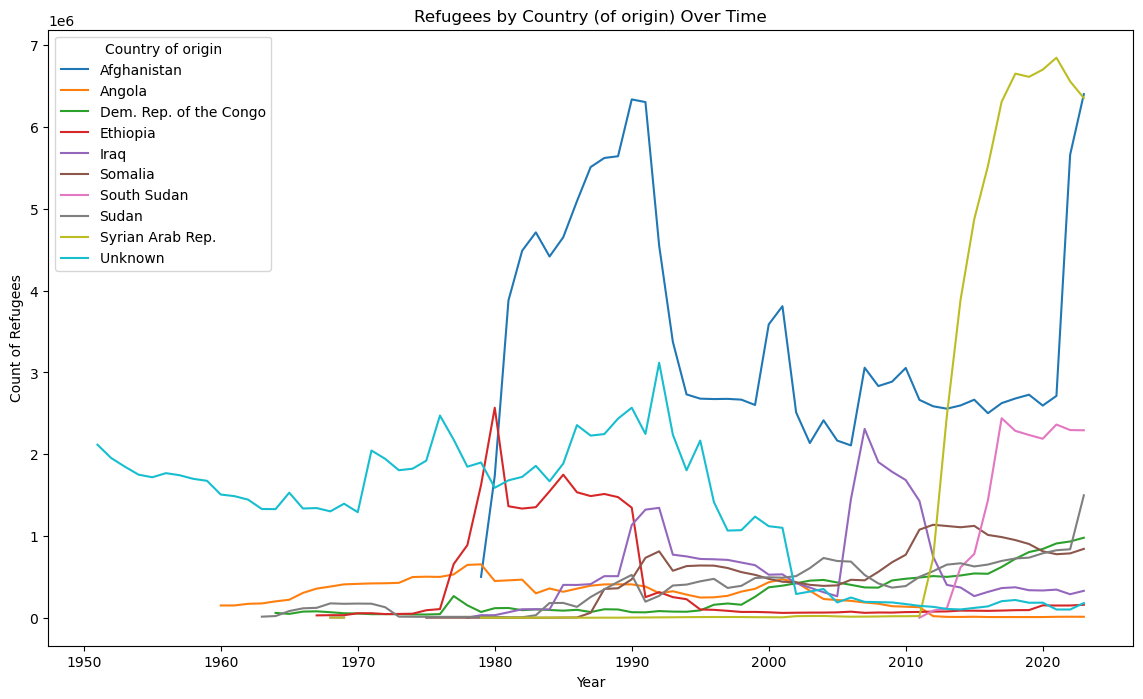

In [147]:
# Now plot this data
plt.figure(figsize=(14, 8))
df_pivot.plot(kind='line', legend=True, ax=plt.gca())

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Count of Refugees')
plt.title('Refugees by Country (of origin) Over Time')
plt.show()

In [183]:
# find countries with the highest number of refugees in a single year
(
    pop_df.groupby(['Year', 'Country of origin'])['Refugees under UNHCR\'s mandate'].sum()
    .reset_index()
    .sort_values('Refugees under UNHCR\'s mandate', ascending=False)
    .head(20)
)

,Year,Country of origin,Refugees under UNHCR's mandate
6802,2021,Syrian Arab Rep.,6848865
6599,2020,Syrian Arab Rep.,6702910
6197,2018,Syrian Arab Rep.,6654374
6397,2019,Syrian Arab Rep.,6615249
7007,2022,Syrian Arab Rep.,6559736
7035,2023,Afghanistan,6403144
7211,2023,Syrian Arab Rep.,6355788
1159,1990,Afghanistan,6339095
6000,2017,Syrian Arab Rep.,6310498
1254,1991,Afghanistan,6306301
